In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load Data

In [47]:
dt = pd.read_csv('DATASET DIABETES.csv')
dt.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [48]:
dt.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

In [49]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

# Summary Statistics Data

In [50]:
a = dt.describe()
a

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


# Eksplorasi Data

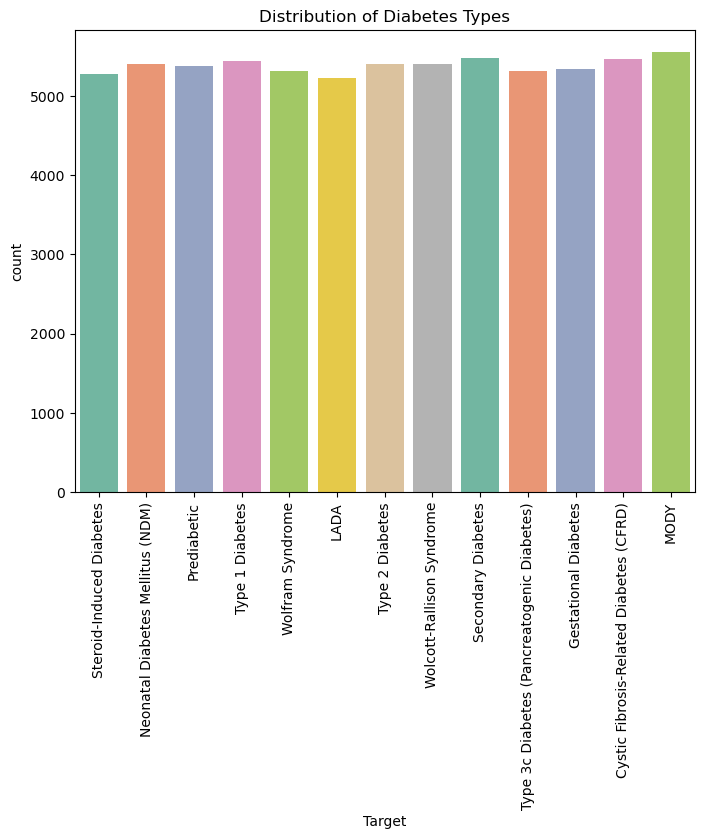

In [51]:
# Count plot for Target (Diabetes Types)
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=dt, palette='Set2')
plt.title('Distribution of Diabetes Types')
plt.xticks(rotation=90)
plt.show()

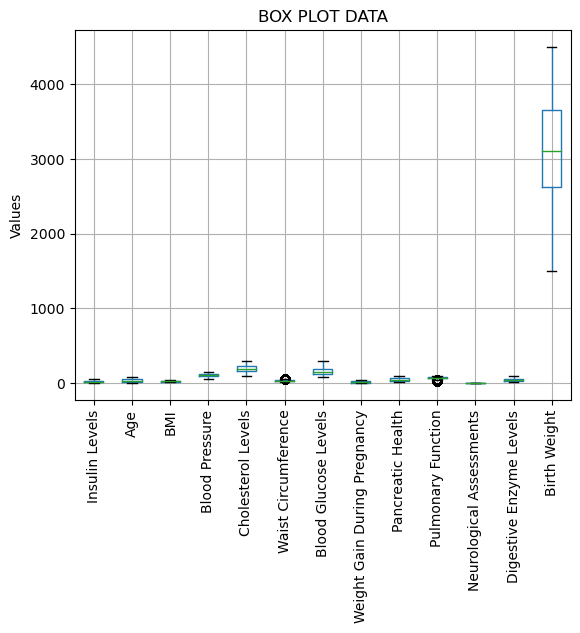

In [52]:
dt.boxplot() # membuat boxplot dari data
plt.title('BOX PLOT DATA') # membuat judul boxplot
plt.ylabel('Values') # menentukan label y sebagagi value dari variabel
plt.xticks(rotation = 90) # memperbaiki posisi label variabel (sumbu-x)
plt.show() # menampilkan boxplot

In [58]:
# Menghitung matriks korelasi
korelasi = dt.corr()
print(korelasi)

                              Insulin Levels       Age       BMI  \
Insulin Levels                      1.000000  0.608128  0.534044   
Age                                 0.608128  1.000000  0.662997   
BMI                                 0.534044  0.662997  1.000000   
Blood Pressure                      0.581814  0.763398  0.654009   
Cholesterol Levels                  0.551892  0.730426  0.603086   
Waist Circumference                 0.580608  0.733633  0.620750   
Blood Glucose Levels                0.102301  0.027659 -0.047480   
Weight Gain During Pregnancy        0.510186  0.698480  0.588552   
Pancreatic Health                   0.295518  0.444710  0.386623   
Pulmonary Function                  0.123034  0.261972  0.233309   
Neurological Assessments            0.411620  0.482672  0.372847   
Digestive Enzyme Levels             0.398418  0.581695  0.523032   
Birth Weight                        0.396347  0.523554  0.476306   

                              Blood Pressure  C

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24280\3061657128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = dt.corr()


# Korelasi Data

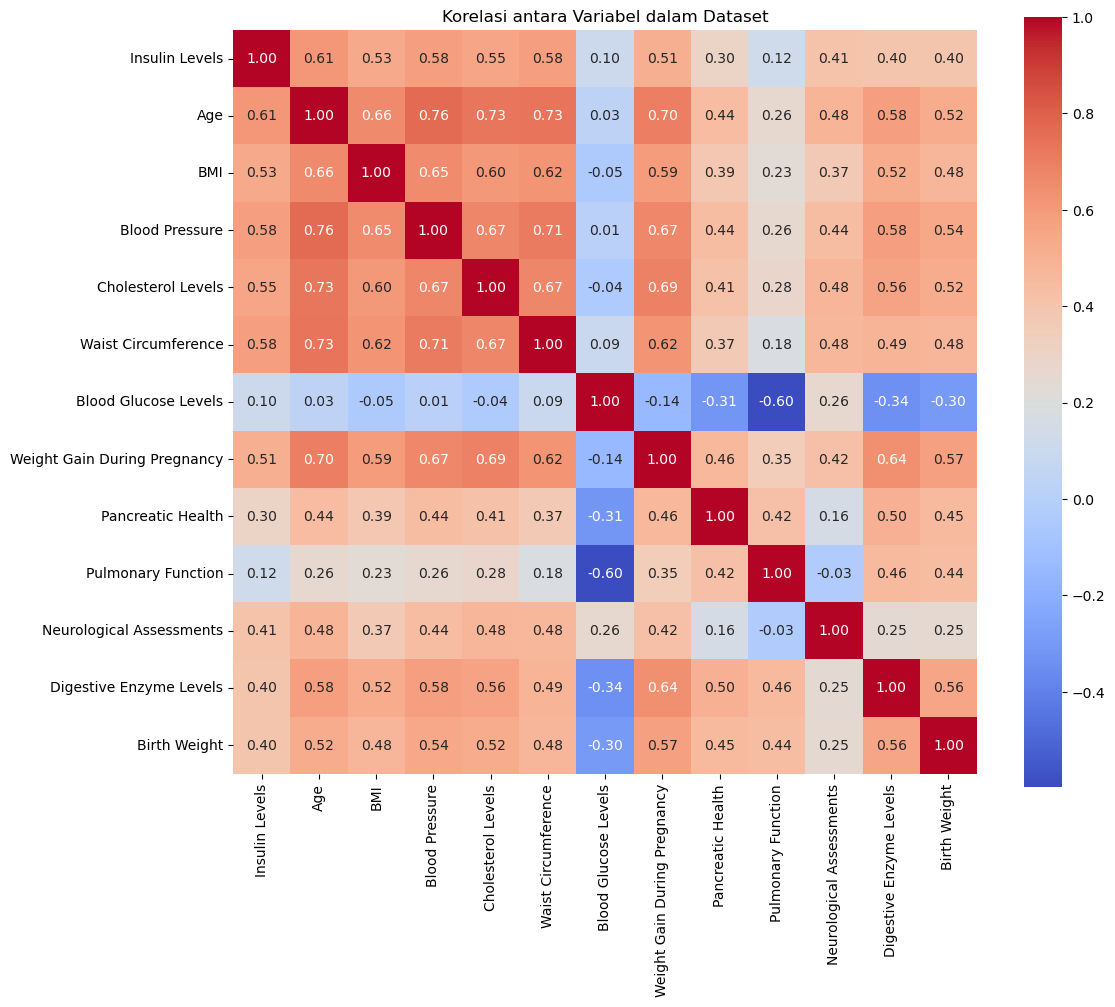

In [61]:
# Mengatur ukuran figure
plt.figure(figsize=(12, 10))

# Membuat heatmap
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Menambahkan judul
plt.title('Korelasi antara Variabel dalam Dataset')

# Menampilkan plot
plt.show()